# P.VIJAY SRINIVASAN 

# THE SPARKS FOUNDATION


# GRIP-TASK 1 


# PREDICTION USING SUPERVISED LEARNING

In [160]:
print("TASK-1:PREDICTION USING SUPERVISED MACHINE LEARNING") 

TASK-1:PREDICTION USING SUPERVISED MACHINE LEARNING


# Loading the libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(data)
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# This data is so user friendly as it does not consists of any null values and so no pre-processing needs to be done
# It consists of number of hours studied by students and marks scored based by the student based  -->
# on the total hours of studying.

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# NOW LET'S PLAY WITH THE DATA 

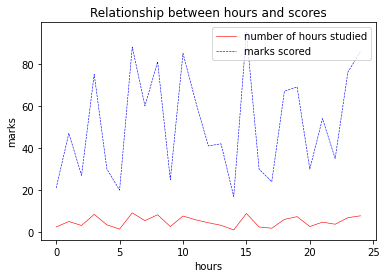

In [117]:
df['Hours'].plot(linestyle='-',linewidth=0.6,label='number of hours studied',color='red')
df['Scores'].plot(linestyle='dashed',linewidth=0.6,label='marks scored',color='blue')
plt.xlabel('hours')
plt.ylabel('marks')
plt.legend(loc=1)
plt.title("Relationship between hours and scores")
plt.show()

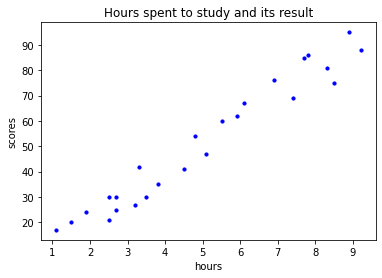

In [118]:
plt.scatter(df['Hours'],df['Scores'],s=10,color='blue')
plt.xlabel('hours')
plt.ylabel('scores')
plt.title('Hours spent to study and its result')
plt.show()
# here from this we can come to a conclusion that except some of the data that is not propotional to hours spent and marks scored
# But most of the data falls under direct relationship of hours spent and marks scored
# AS hours spent increases the marks that the student will score will increase,there fore it is directly propotional to each
# other

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df.drop('Scores',axis=1)
y=df['Scores']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


# now let's use machine learning to train the machine to predict the scores based in number of hours
# now we need to split this data into training data which is fed to the machine 
# testing data is used as a new data from which the machine will predict scores based on it's previous training experience


In [38]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
model

LinearRegression()

No handles with labels found to put in legend.


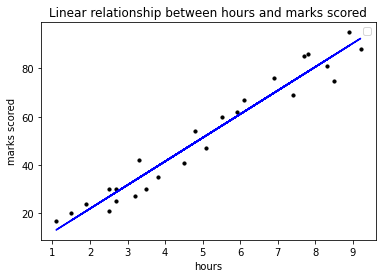

In [32]:
# now let's plot the linear line or slope 
slope=model.coef_*X+model.intercept_
slope
plt.scatter(X,y,s=10,color='black')
plt.plot(X,slope,linestyle='solid',color='blue')
plt.xlabel('hours')
plt.ylabel('marks scored')
plt.title('Linear relationship between hours and marks scored')
plt.legend(loc='best')
plt.show()

In [34]:
y_pred=model.predict(X_test)
y_pred
y_test

5     20
2     27
19    69
16    30
11    62
22    35
17    24
24    86
Name: Scores, dtype: int64

In [35]:
# Now let's see how well our trained model has performed
# model's performance can be measured by using mean absolute error,r2_score,mean squared error,root mean squared error
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
df1=pd.DataFrame({'Predicted scores':y_pred,'Actual scores':y_test})
print('mean absolute error',mean_absolute_error(y_test,y_pred))
print('mean squared error',mean_squared_error(y_test,y_pred))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score',r2_score(y_test,y_pred))
df1

mean absolute error 4.419727808027652
mean squared error 22.96509721270043
root mean squared error 4.792191274636315
r2_score 0.9568211104435257


,Predicted scores,Actual scores
5,17.053665,20
2,33.694229,27
19,74.806209,69
16,26.842232,30
11,60.123359,62
22,39.567369,35
17,20.969092,24
24,78.721636,86


In [36]:
# now let's predict what will be the mark scored by a student if he studied 9.25 hours/day
time=np.array(9.25)
time=time.reshape(-1,1)
predicted_score=model.predict(time)
print('if a student studies for 9.25 hrs/day his estimated score will be {}'.format(predicted_score))

if a student studies for 9.25 hrs/day his estimated score will be [92.91505723]


In [37]:
training_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print(training_score)
print('The accuracy of the model is {}'.format(test_score))

0.9484997422695115
The accuracy of the model is 0.9568211104435257


# By using this linear regressor we were able to predict the score when a student studies for 9.25 hrs/day and the PREDICTED
# SCORE IS 92.91%

# THANK YOU